<div style="text-align: center;">
    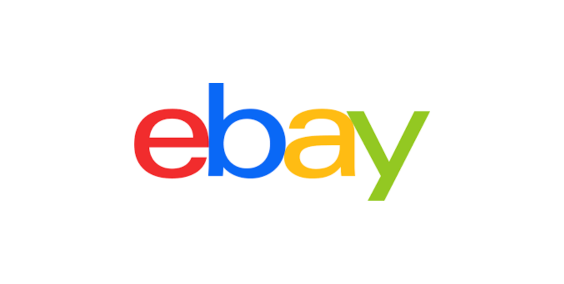
</div>


# 📊 eBay Stock Price Analysis (1998 - Present) 🛒💰  

## 📌 Introduction  

This notebook explores the **historical stock prices of eBay Inc. (EBAY) from 1998 to the 2025**, using **Yahoo Finance** data.  
The analysis includes **price trends, market activity, volatility, outlier detection, and event-based insights** to better understand eBay's stock performance.  

🔹 **Dataset Type:** Time Series Data  
🔹 **Stock Symbol:** `EBAY`  
🔹 **Source:** Yahoo Finance  
🔹 **Date Range:** 1998 - 2025  

---

## 📂 Dataset Overview  

The dataset contains essential stock market information, including **opening price, closing price, highest and lowest prices, adjusted close, and trading volume**.  

### 📋 **Column Descriptions**  

| Column Name  | Description |
|-------------|------------|
| 🗓 **Date** | Trading date of the stock |
| 📈 **Open** | Stock price at the market opening |
| 📊 **High** | Highest price during the trading day |
| 📉 **Low** | Lowest price during the trading day |
| 🔥 **Close** | Stock price at market closing |
| ✅ **Adj Close** | Adjusted closing price after dividends/splits |
| 📊 **Volume** | Total number of shares traded on that day |

---

## 🛠 Steps Performed in This Notebook  

This notebook follows a structured approach to analyze eBay's stock performance:

### 📌 **1. Data Preparation & Cleaning** 🧼  
✔ Load the dataset and convert the **Date** column into a proper `datetime` format.  
✔ Extract **Year, Month, and Day Name** from the Date column.  
✔ Handle missing values and remove unnecessary columns.  

### 📌 **2. Exploratory Data Analysis (EDA)** 🔎  
✔ **Stock Price Trends** 📈: Visualized overall stock movement from 1998 to the present.  
✔ **Seasonality Analysis** 📅: Identified yearly, monthly, and weekly patterns.  
✔ **Rolling Averages** 📊: Computed **50-day, 100-day, and 200-day moving averages**.  
✔ **Price Volatility** ⚡: Analyzed daily, weekly, and yearly stock price fluctuations.  
✔ **Trading Volume Trends** 📉: Studied how trading volume changed over the years.  

### 📌 **3. Statistical & Outlier Analysis** 📊  
✔ **Stock Price Distribution** 📊: Plotted histograms and boxplots for price behavior.  
✔ **Price Change Analysis** 🔄: Computed daily, weekly, and monthly percentage changes.  
✔ **Outlier Detection** ⚠️: Used **Z-score & IQR** methods to identify unusual price movements.  

### 📌 **4. Time-Based Analysis** ⏳  
✔ **Monthly & Yearly Performance** 📆: Identified the best and worst performing months/years.  
✔ **Day of the Week Effect** 📅: Analyzed if certain days of the week show significant trends.  
✔ **Pre & Post Earnings Impact** 📊: Studied stock behavior around earnings reports.  

### 📌 **5. Stock Market Events & Anomalies** 🔥  
✔ **Impact of Major Events** 📉: Examined how eBay’s stock reacted to **financial crises and COVID-19**.  
✔ **Stock Splits Analysis** 📊: Studied price movement before and after stock splits.  
✔ **Sudden Price Spikes & Drops** 🚀: Investigated the reasons behind sharp price movements.  

### 📌 **6. Correlation & Trend Analysis** 🔄  
✔ **Price Correlations** 📊: Identified relationships between **Open, High, Low, Close, and Volume**.  
✔ **Lag Analysis** ⏳: Checked if past prices influence future stock behavior.  
✔ **Moving Averages vs. Actual Price** 📉: Compared **SMA (Simple Moving Average) and EMA (Exponential Moving Average)**.  

---

## 🎯 Key Takeaways  
✔ eBay's stock shows **seasonal trends** with specific months and years having higher volatility.  
✔ The **Monday Effect** is analyzed to see if Mondays are riskier for stock movements.  
✔ Major events like the **2008 Financial Crisis & COVID-19** had a **significant impact on stock prices**.  
✔ **Outlier detection** helps in spotting unusual stock price movements.  
✔ **Volume analysis** reveals how trading activity affects price fluctuations.  

---

## 📢 Final Thoughts  
This notebook provides **a comprehensive analysis of eBay’s stock performance over the years**.  
You can use these insights for **financial research, stock trading strategies, and predictive modeling**.  

🔹 **If you found this notebook useful, don't forget to upvote and leave your feedback!** 🚀💬  

Happy analyzing! 📊✨  


# **📚 Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings

# **⚙️ Basic Important Settings**

In [2]:
plt.style.use("dark_background")
warnings.filterwarnings("ignore")

# **📂 Loading Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/ebay-socks-data-2025/ebay_stocks_data.csv") 

# **🔍 Exploring Dataset**

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1998-09-24 00:00:00-04:00,0.938201,0.951354,0.775989,0.830791,0.750675,518656090
1,1998-09-25 00:00:00-04:00,0.797910,0.808870,0.721188,0.786949,0.711061,121255834
2,1998-09-28 00:00:00-04:00,0.832983,0.892168,0.806678,0.846135,0.764539,89772883
3,1998-09-29 00:00:00-04:00,0.865863,0.881208,0.837367,0.857095,0.774443,39289536
4,1998-09-30 00:00:00-04:00,0.827502,0.841751,0.758453,0.790237,0.714032,44113766


In [5]:
# Convert 'Date' while handling time zones
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)

# Remove timezone info
df["Date"] = df["Date"].dt.tz_convert(None)

# Extract Year, Month, and Day Name
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_Name"] = df["Date"].dt.day_name()
df['DayOfWeek'] = df['Date'].dt.day_name()

# Display result
print(df.head())

                 Date      Open      High       Low     Close  Adj Close  \
0 1998-09-24 04:00:00  0.938201  0.951354  0.775989  0.830791   0.750675   
1 1998-09-25 04:00:00  0.797910  0.808870  0.721188  0.786949   0.711061   
2 1998-09-28 04:00:00  0.832983  0.892168  0.806678  0.846135   0.764539   
3 1998-09-29 04:00:00  0.865863  0.881208  0.837367  0.857095   0.774443   
4 1998-09-30 04:00:00  0.827502  0.841751  0.758453  0.790237   0.714032   

      Volume  Year  Month  Day   Day_Name  DayOfWeek  
0  518656090  1998      9   24   Thursday   Thursday  
1  121255834  1998      9   25     Friday     Friday  
2   89772883  1998      9   28     Monday     Monday  
3   39289536  1998      9   29    Tuesday    Tuesday  
4   44113766  1998      9   30  Wednesday  Wednesday  


# **📊 Exploratory Data Analysis**

# **📌 Basic Data Exploration**

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Day_Name,DayOfWeek
0,1998-09-24 04:00:00,0.938201,0.951354,0.775989,0.830791,0.750675,518656090,1998,9,24,Thursday,Thursday
1,1998-09-25 04:00:00,0.797910,0.808870,0.721188,0.786949,0.711061,121255834,1998,9,25,Friday,Friday
2,1998-09-28 04:00:00,0.832983,0.892168,0.806678,0.846135,0.764539,89772883,1998,9,28,Monday,Monday
3,1998-09-29 04:00:00,0.865863,0.881208,0.837367,0.857095,0.774443,39289536,1998,9,29,Tuesday,Tuesday
4,1998-09-30 04:00:00,0.827502,0.841751,0.758453,0.790237,0.714032,44113766,1998,9,30,Wednesday,Wednesday


In [7]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
Day_Name     0
DayOfWeek    0
dtype: int64


In [8]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Year                  int32
Month                 int32
Day                   int32
Day_Name             object
DayOfWeek            object
dtype: object


In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,6651,2011-12-12 23:02:01.786197504,1998-09-24 04:00:00,2005-05-05 16:00:00,2011-12-09 05:00:00,2018-07-21 16:00:00,2025-03-04 05:00:00,NaN
Open,6651.0,24.014248,0.488829,10.378788,18.474327,35.844999,80.970001,17.286821
High,6651.0,24.337657,0.512942,10.56805,18.73527,36.145,81.190002,17.481863
Low,6651.0,23.708194,0.442796,10.197811,18.240742,35.525,79.900002,17.114001
Close,6651.0,24.02365,0.508558,10.414563,18.472221,35.905001,80.589996,17.295534
Adj Close,6651.0,22.241823,0.459516,9.410253,16.690884,32.658455,75.622353,16.58275
Volume,6651.0,32154075.992482,1471900.0,9326150.0,25078680.0,43003699.0,577698739.0,33397802.091612
Year,6651.0,2011.444745,1998.0,2005.0,2011.0,2018.0,2025.0,7.635714
Month,6651.0,6.558262,1.0,4.0,7.0,10.0,12.0,3.450622
Day,6651.0,15.740039,1.0,8.0,16.0,23.0,31.0,8.76009


### **Missing Values**

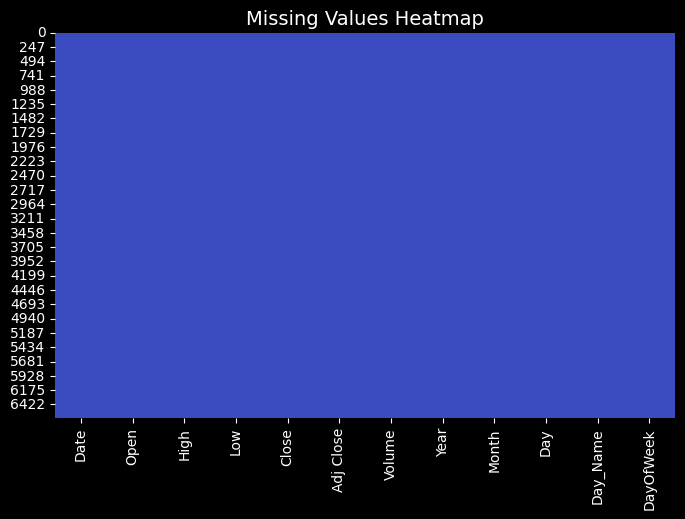

In [10]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()

### **Boxplots for Stock Prices**

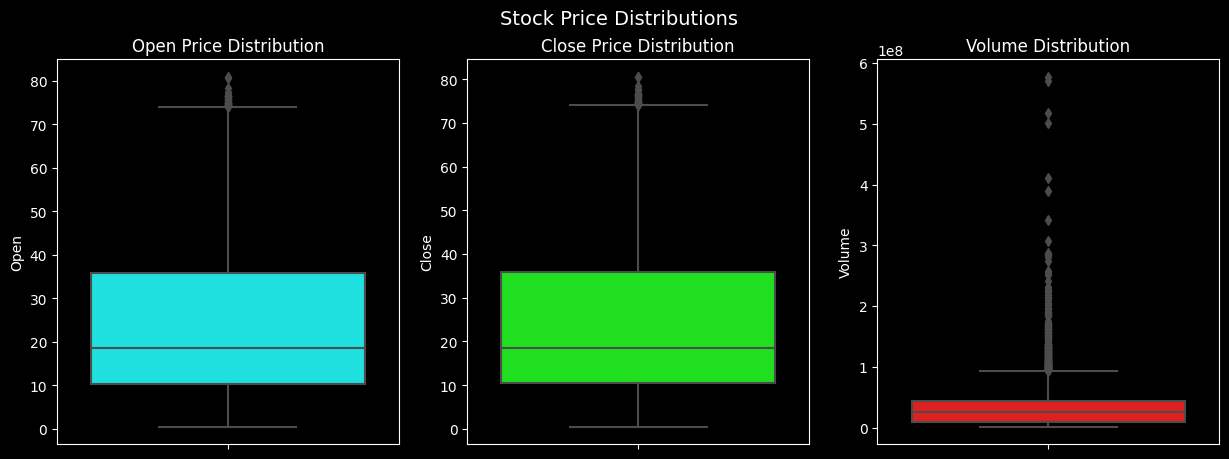

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(y=df["Open"], ax=ax[0], color="cyan")
ax[0].set_title("Open Price Distribution", fontsize=12)

sns.boxplot(y=df["Close"], ax=ax[1], color="lime")
ax[1].set_title("Close Price Distribution", fontsize=12)

sns.boxplot(y=df["Volume"], ax=ax[2], color="red")
ax[2].set_title("Volume Distribution", fontsize=12)

plt.suptitle("Stock Price Distributions", fontsize=14, color="white")
plt.show()

### **Histogram for Stock Prices**

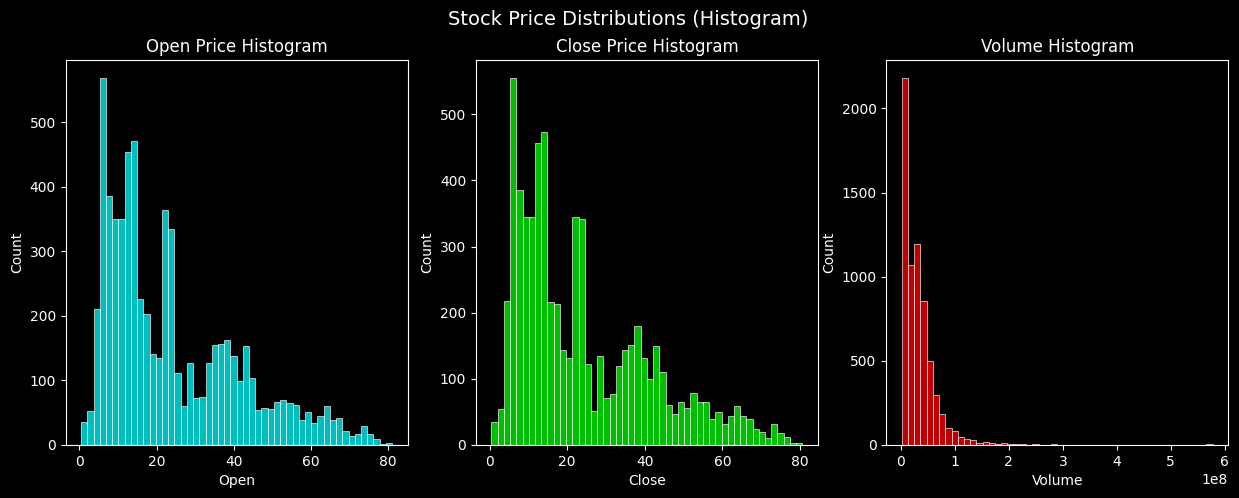

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df["Open"], bins=50, ax=ax[0], color="cyan")
ax[0].set_title("Open Price Histogram", fontsize=12)

sns.histplot(df["Close"], bins=50, ax=ax[1], color="lime")
ax[1].set_title("Close Price Histogram", fontsize=12)

sns.histplot(df["Volume"], bins=50, ax=ax[2], color="red")
ax[2].set_title("Volume Histogram", fontsize=12)

plt.suptitle("Stock Price Distributions (Histogram)", fontsize=14, color="white")
plt.show()

# **📊 Stock Price Trends & Patterns**

### **📊 Overall Stock Trend**

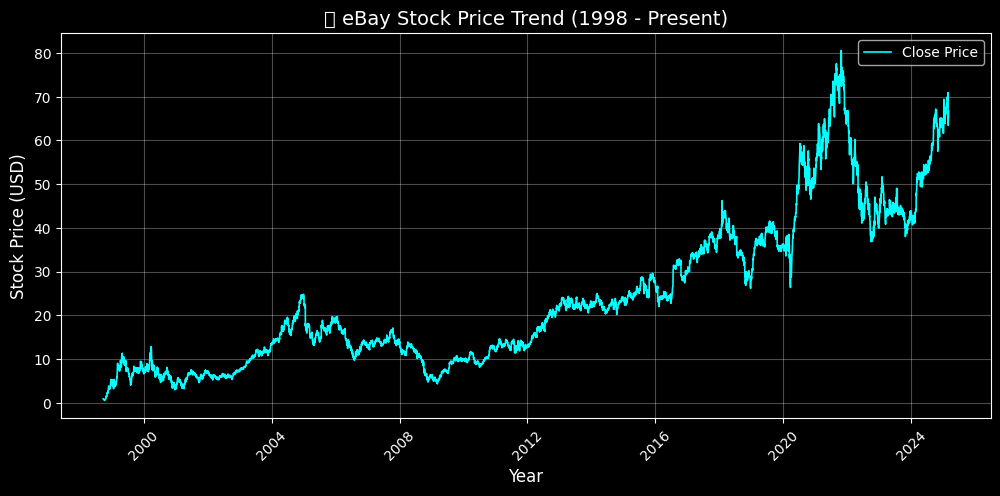

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Close"], color="cyan", linewidth=1.2, label="Close Price")  
plt.xlabel("Year", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.title("📈 eBay Stock Price Trend (1998 - Present)", fontsize=14, color="white")
plt.legend()
plt.grid(alpha=0.3)

plt.xticks(rotation=45)  

plt.show()

### **📅 Seasonality Analysis (Yearly Trends)**

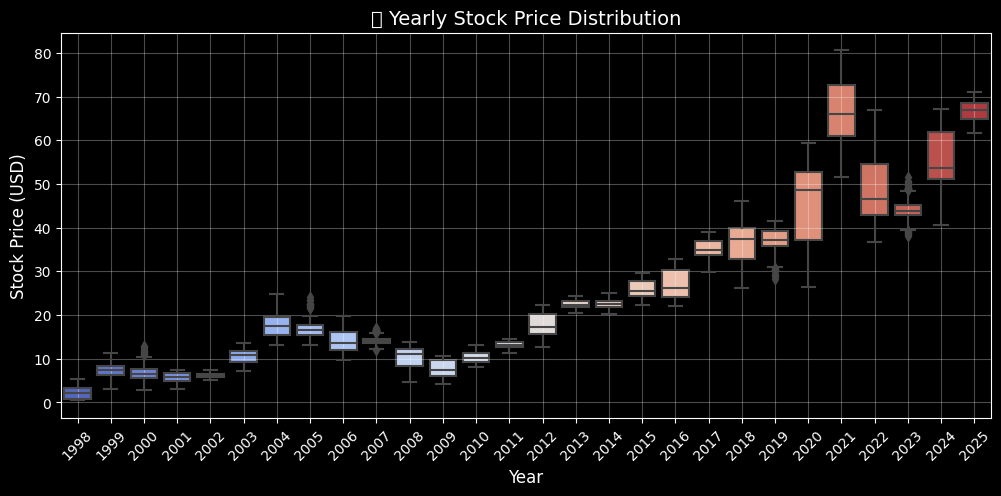

In [14]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Year"], y=df["Close"], palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.title("📆 Yearly Stock Price Distribution", fontsize=14, color="white")
plt.grid(alpha=0.3)
plt.show()

### **📊 Rolling Averages (50-day, 100-day, 200-day)**

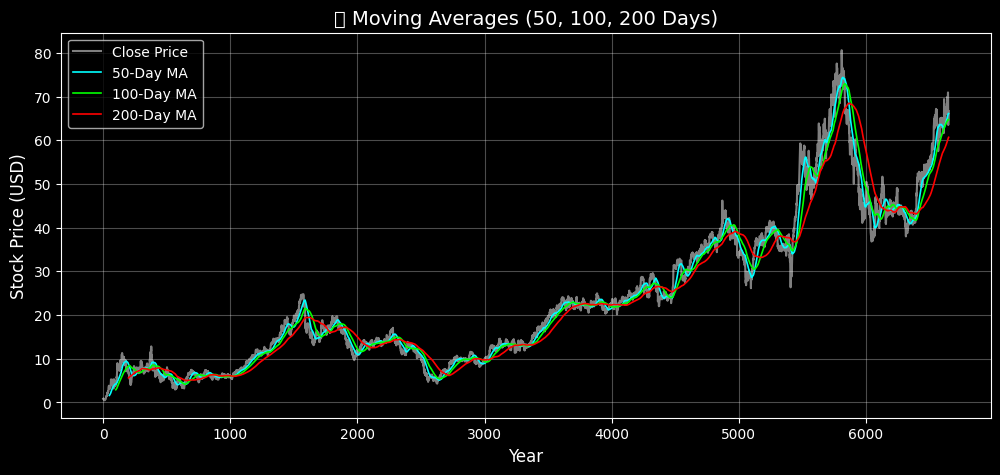

In [15]:
df["50_MA"] = df["Close"].rolling(window=50).mean()
df["100_MA"] = df["Close"].rolling(window=100).mean()
df["200_MA"] = df["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 5))
plt.plot(df["Close"], color="white", alpha=0.5, label="Close Price")
plt.plot(df["50_MA"], color="cyan", linewidth=1.2, label="50-Day MA")
plt.plot(df["100_MA"], color="lime", linewidth=1.2, label="100-Day MA")
plt.plot(df["200_MA"], color="red", linewidth=1.2, label="200-Day MA")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.title("📊 Moving Averages (50, 100, 200 Days)", fontsize=14, color="white")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### **📉 Price Volatility (Rolling Standard Deviation)**

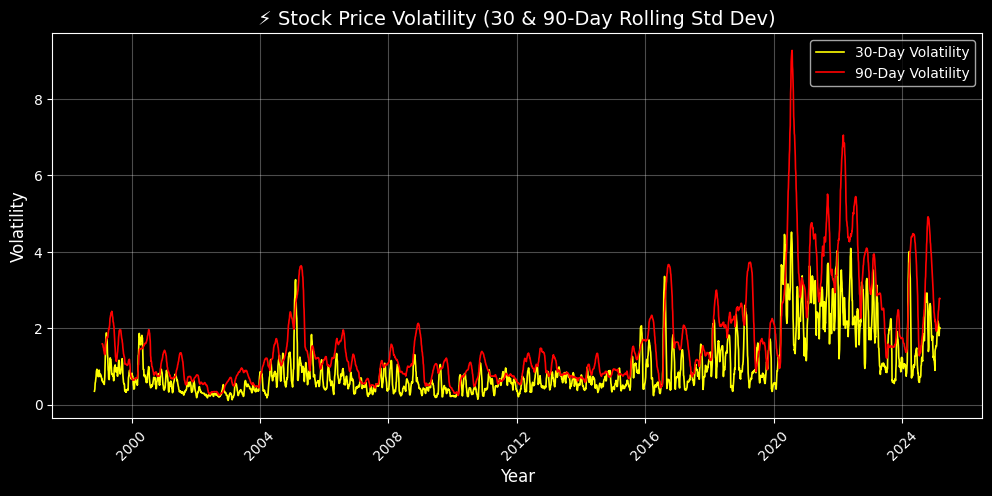

In [16]:
df["Volatility_30"] = df["Close"].rolling(window=30).std()
df["Volatility_90"] = df["Close"].rolling(window=90).std()
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Volatility_30"], color="yellow", linewidth=1.2, label="30-Day Volatility")
plt.plot(df["Date"], df["Volatility_90"], color="red", linewidth=1.2, label="90-Day Volatility")

plt.xlabel("Year", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.title("⚡ Stock Price Volatility (30 & 90-Day Rolling Std Dev)", fontsize=14, color="white")
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)  

plt.show()


### **🔥 Highest & Lowest Prices**

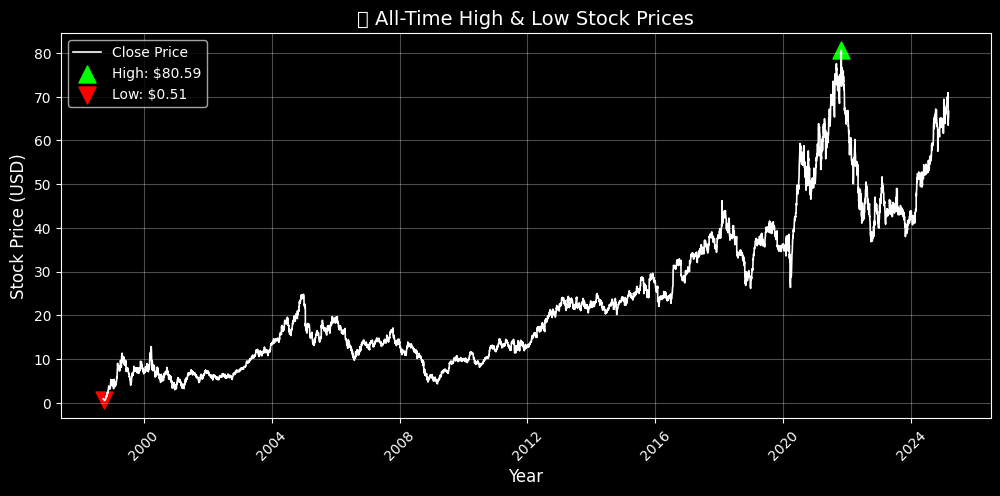

In [17]:
highest_price = df["Close"].max()
lowest_price = df["Close"].min()
highest_date = df["Close"].idxmax()
lowest_date = df["Close"].idxmin()
plt.figure(figsize=(12, 5))

plt.plot(df["Date"], df["Close"], color="white", linewidth=1.2, label="Close Price")

plt.scatter(df.loc[highest_date, "Date"], highest_price, 
            color="lime", marker="^", s=150, 
            label=f"High: ${highest_price:.2f}")

plt.scatter(df.loc[lowest_date, "Date"], lowest_price, 
            color="red", marker="v", s=150, 
            label=f"Low: ${lowest_price:.2f}")

plt.xlabel("Year", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.title("🔝 All-Time High & Low Stock Prices", fontsize=14, color="white")
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)  
plt.show()


# **📉 Volume & Market Activity Analysis**

#### **1️⃣ Trading Volume Trends (Over Time)**

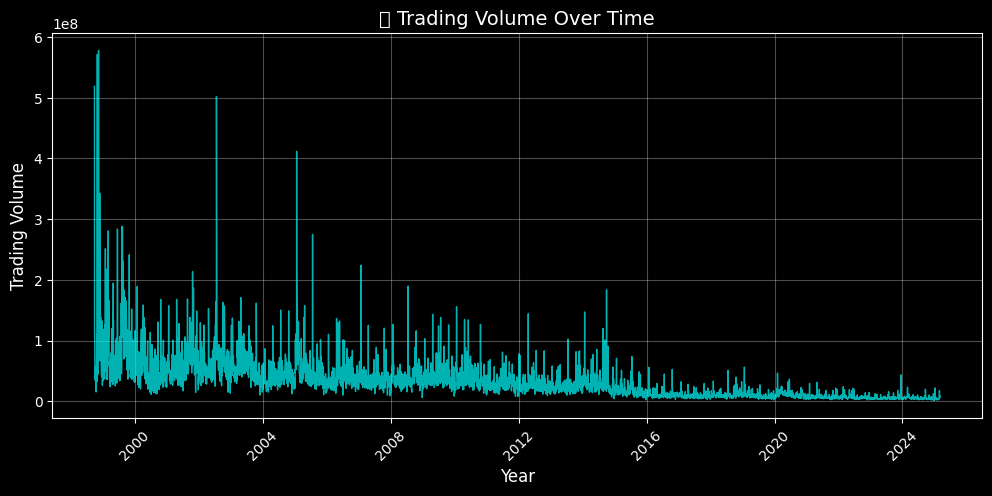

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(df["Date"], df["Volume"], color="cyan", alpha=0.7, linewidth=1)

plt.xlabel("Year", fontsize=12, color="white")
plt.ylabel("Trading Volume", fontsize=12, color="white")
plt.title("📈 Trading Volume Over Time", fontsize=14, color="white")
plt.grid(alpha=0.3)
plt.xticks(rotation=45)  
plt.show()


### **2️⃣ High-Volume Days (Top 10)**

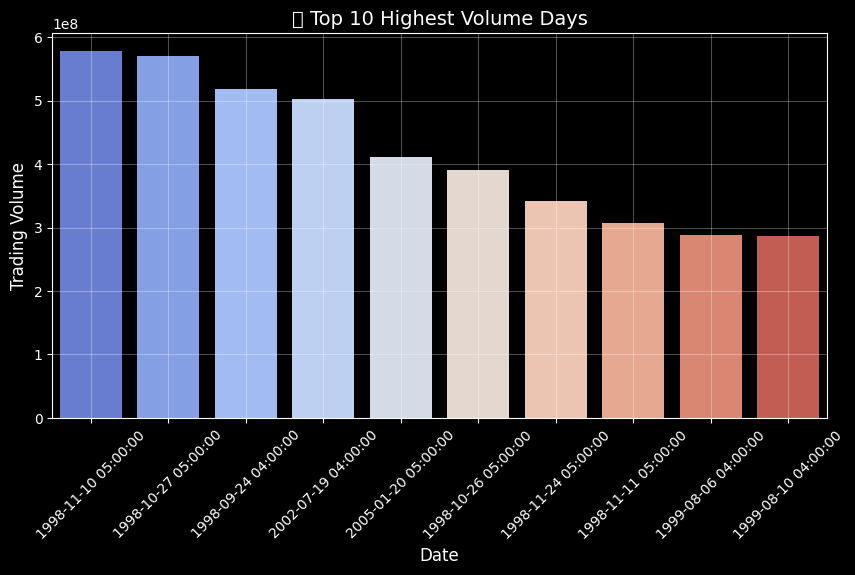

In [19]:
top_volume_days = df.nlargest(10, "Volume")
plt.figure(figsize=(10, 5))
sns.barplot(x=top_volume_days["Date"], y=top_volume_days["Volume"], palette="coolwarm")
plt.xticks(rotation=45)  
plt.xlabel("Date", fontsize=12, color="white")
plt.ylabel("Trading Volume", fontsize=12, color="white")
plt.title("🚀 Top 10 Highest Volume Days", fontsize=14, color="white")
plt.grid(alpha=0.3)

plt.show()


### **3️⃣ Correlation Between Volume & Price Changes**

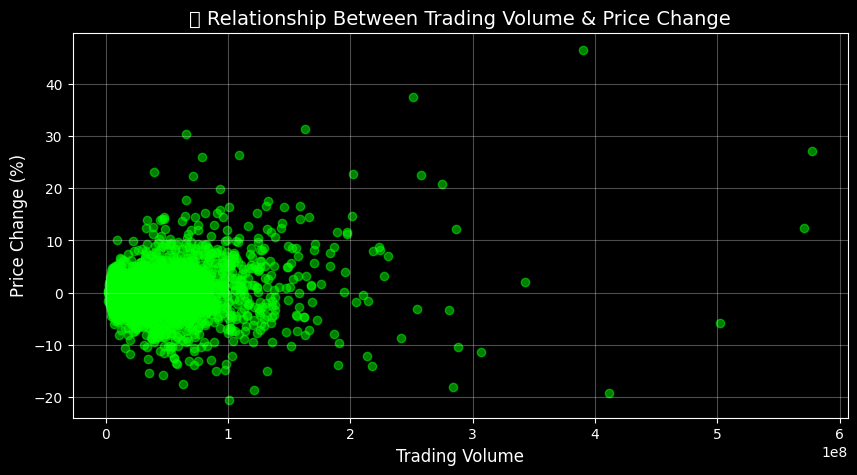

In [20]:
df["Daily Change %"] = df["Close"].pct_change() * 100  
plt.figure(figsize=(10, 5))
plt.scatter(df["Volume"], df["Daily Change %"], alpha=0.5, color="lime")
plt.xlabel("Trading Volume", fontsize=12, color="white")
plt.ylabel("Price Change (%)", fontsize=12, color="white")
plt.title("🔄 Relationship Between Trading Volume & Price Change", fontsize=14, color="white")
plt.grid(alpha=0.3)
plt.show()

# **🔍 Stock Price Distribution & Statistical Analysis**

### **1️⃣ Distribution of Prices**

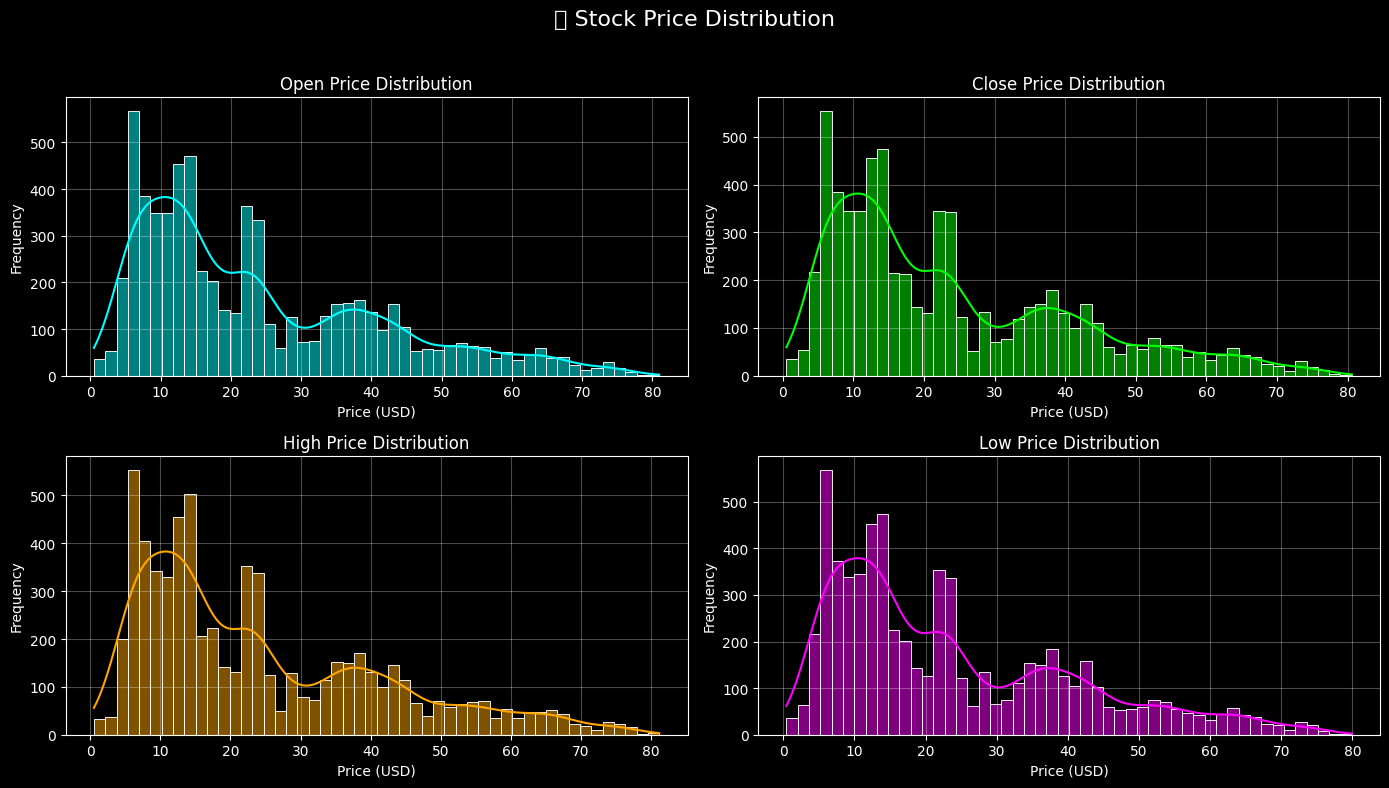

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle("📊 Stock Price Distribution", fontsize=16, color="white")

price_cols = ["Open", "Close", "High", "Low"]
colors = ["cyan", "lime", "orange", "magenta"]

for ax, col, color in zip(axes.flatten(), price_cols, colors):
    sns.histplot(df[col], bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f"{col} Price Distribution", fontsize=12, color="white")
    ax.set_xlabel("Price (USD)", fontsize=10, color="white")
    ax.set_ylabel("Frequency", fontsize=10, color="white")
    ax.grid(alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **2️⃣ Price Change Analysis (Daily, Weekly, Monthly)**

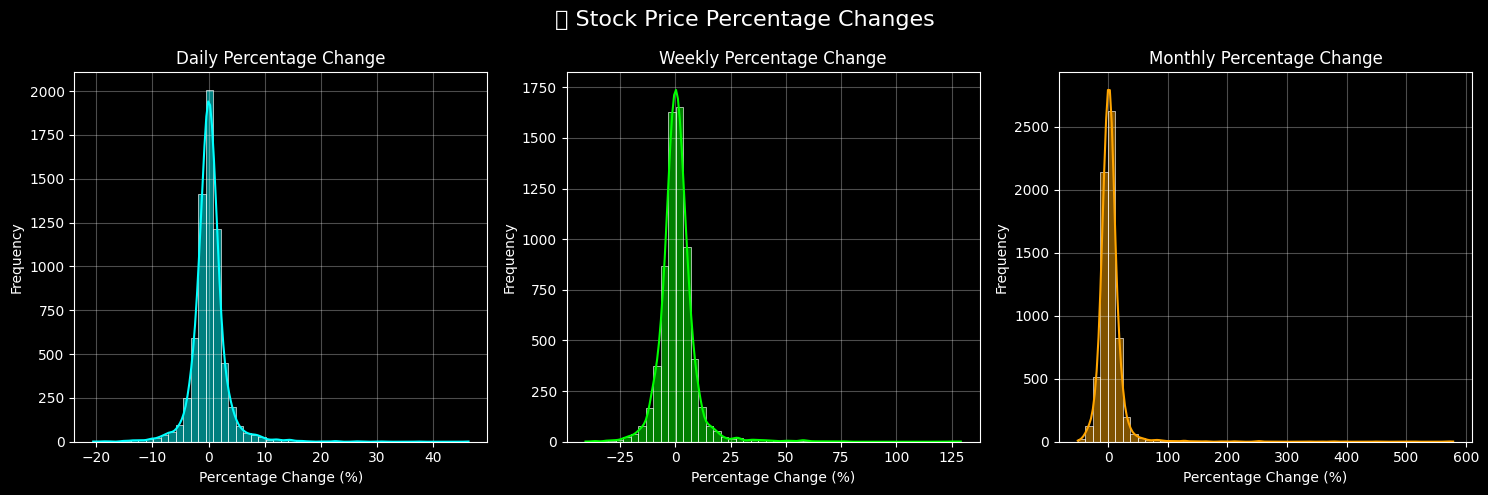

In [22]:
df["Daily Change %"] = df["Close"].pct_change() * 100
df["Weekly Change %"] = df["Close"].pct_change(7) * 100
df["Monthly Change %"] = df["Close"].pct_change(30) * 100

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("📈 Stock Price Percentage Changes", fontsize=16, color="white")

change_cols = ["Daily Change %", "Weekly Change %", "Monthly Change %"]
change_titles = ["Daily", "Weekly", "Monthly"]
colors = ["cyan", "lime", "orange"]

for ax, col, title, color in zip(axes, change_cols, change_titles, colors):
    sns.histplot(df[col].dropna(), bins=50, kde=True, color=color, ax=ax)
    ax.set_title(f"{title} Percentage Change", fontsize=12, color="white")
    ax.set_xlabel("Percentage Change (%)", fontsize=10, color="white")
    ax.set_ylabel("Frequency", fontsize=10, color="white")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### **3️⃣ Outlier Detection (Using Z-score & IQR)**

In [23]:
df["Z-score"] = zscore(df["Close"].dropna())

# Define IQR
Q1 = df["Close"].quantile(0.25)
Q3 = df["Close"].quantile(0.75)
IQR = Q3 - Q1

# Outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outliers using Z-score and IQR
z_outliers = df[np.abs(df["Z-score"]) > 3]  # Z-score outliers
iqr_outliers = df[(df["Close"] < lower_bound) | (df["Close"] > upper_bound)] 

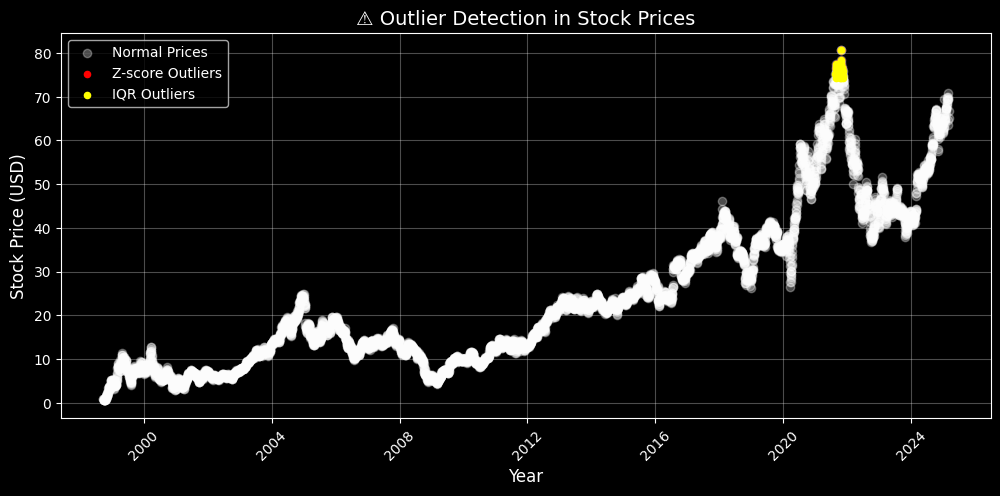

In [24]:
plt.figure(figsize=(12, 5))

plt.scatter(df["Date"], df["Close"], color="white", alpha=0.3, label="Normal Prices")
plt.scatter(z_outliers["Date"], z_outliers["Close"], color="red", label="Z-score Outliers", s=20)
plt.scatter(iqr_outliers["Date"], iqr_outliers["Close"], color="yellow", label="IQR Outliers", s=20)

plt.xlabel("Year", fontsize=12, color="white")
plt.ylabel("Stock Price (USD)", fontsize=12, color="white")
plt.title("⚠️ Outlier Detection in Stock Prices", fontsize=14, color="white")
plt.legend()
plt.grid(alpha=0.3)

plt.xticks(rotation=45)  
plt.show()


# **📅 Time-Based Analysis**

### **1️⃣ Monthly & Yearly Performance**

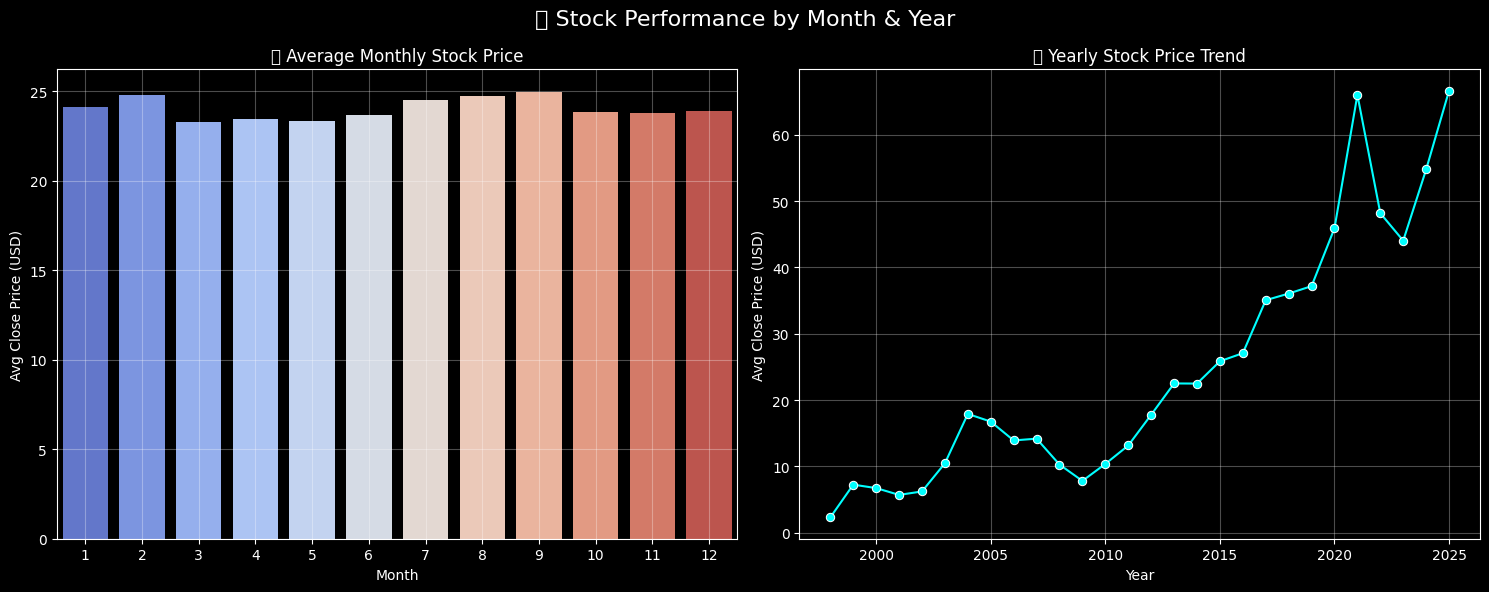

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle("📅 Stock Performance by Month & Year", fontsize=16, color="white")

monthly_avg = df.groupby("Month")["Close"].mean()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, ax=axes[0], palette="coolwarm")
axes[0].set_title("📆 Average Monthly Stock Price", fontsize=12, color="white")
axes[0].set_xlabel("Month", fontsize=10, color="white")
axes[0].set_ylabel("Avg Close Price (USD)", fontsize=10, color="white")
axes[0].grid(alpha=0.3)

yearly_avg = df.groupby("Year")["Close"].mean()
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values, ax=axes[1], color="cyan", marker="o")
axes[1].set_title("📊 Yearly Stock Price Trend", fontsize=12, color="white")
axes[1].set_xlabel("Year", fontsize=10, color="white")
axes[1].set_ylabel("Avg Close Price (USD)", fontsize=10, color="white")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### **2️⃣ Day of the Week Effect (Monday Effect)**

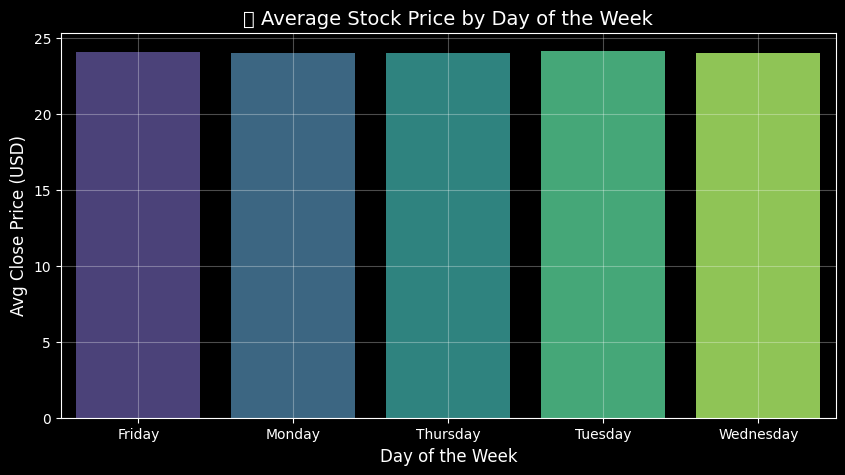

In [26]:
plt.figure(figsize=(10, 5))
weekday_avg = df.groupby("DayOfWeek")["Close"].mean()
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette="viridis")
plt.title("📆 Average Stock Price by Day of the Week", fontsize=14, color="white")
plt.xlabel("Day of the Week", fontsize=12, color="white")
plt.ylabel("Avg Close Price (USD)", fontsize=12, color="white")
plt.grid(alpha=0.3)
plt.show()

### **3️⃣ Pre & Post Earnings Analysis (Simulated Data)**

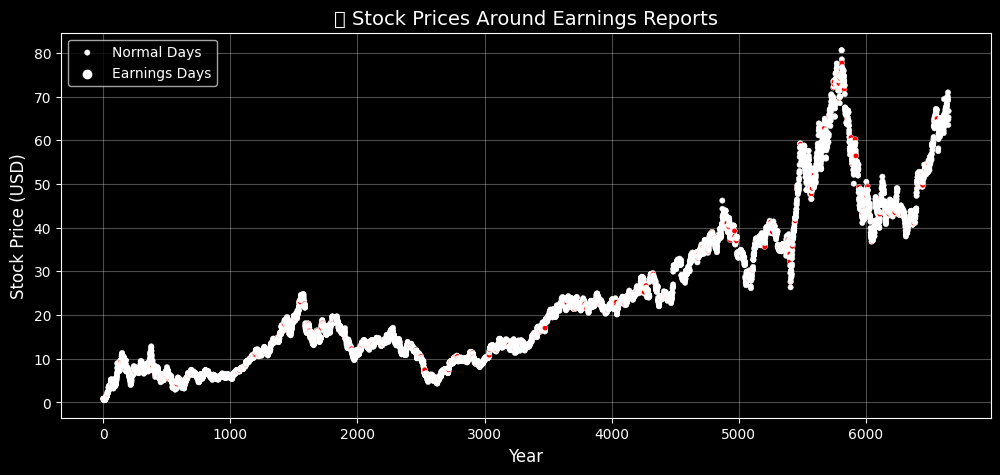

In [27]:
np.random.seed(42)
df["Earnings"] = np.random.choice([0, 1], size=len(df), p=[0.95, 0.05])

df["Pre Earnings"] = df["Close"].shift(1)
df["Post Earnings"] = df["Close"].shift(-1)

plt.figure(figsize=(12, 5))
sns.scatterplot(x=df.index, y=df["Close"], hue=df["Earnings"], palette=["white", "red"], s=15)
plt.xlabel("Year", fontsize=12, color="white")
plt.ylabel("Stock Price (USD)", fontsize=12, color="white")
plt.title("📈 Stock Prices Around Earnings Reports", fontsize=14, color="white")
plt.legend(["Normal Days", "Earnings Days"], loc="upper left")
plt.grid(alpha=0.3)
plt.show()

# **🔥 Stock Market Events & Anomalies**

### **1️⃣ Major Economic Events**

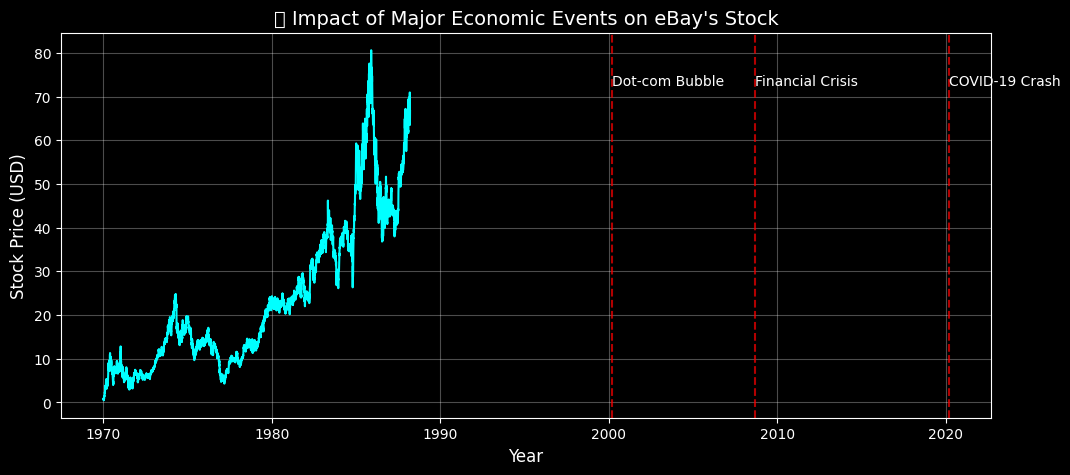

In [28]:
events = {
    "2000-03": "Dot-com Bubble",
    "2008-09": "Financial Crisis",
    "2020-03": "COVID-19 Crash",
}

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Close"], color="cyan", linewidth=1.5)
for date, event in events.items():
    plt.axvline(pd.to_datetime(date), color="red", linestyle="--", alpha=0.7)
    plt.text(pd.to_datetime(date), df["Close"].max() * 0.9, event, color="white", fontsize=10)

plt.xlabel("Year", fontsize=12, color="white")
plt.ylabel("Stock Price (USD)", fontsize=12, color="white")
plt.title("📉 Impact of Major Economic Events on eBay's Stock", fontsize=14, color="white")
plt.grid(alpha=0.3)
plt.show()

### **2️⃣ Stock Splits Impact**

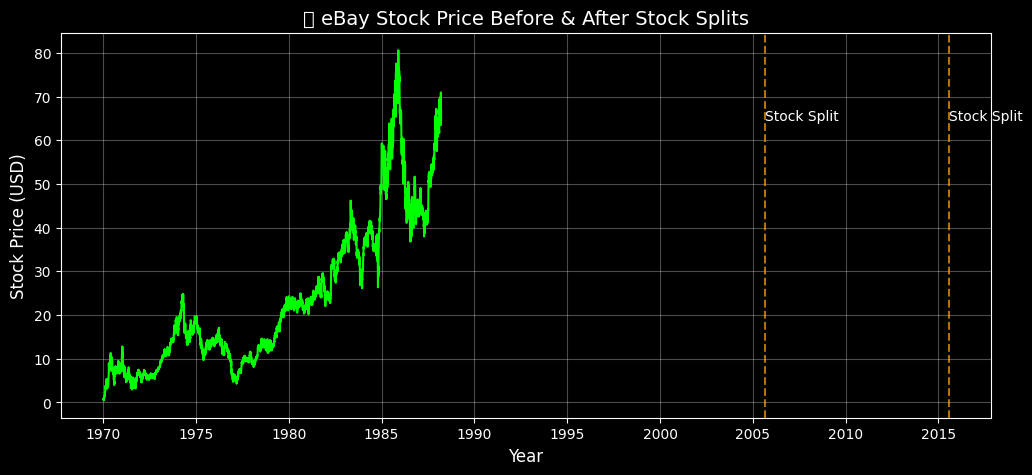

In [29]:
stock_splits = ["2005-08-29", "2015-07-20"] 

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Close"], color="lime", linewidth=1.5)
for split_date in stock_splits:
    plt.axvline(pd.to_datetime(split_date), color="orange", linestyle="--", alpha=0.7)
    plt.text(pd.to_datetime(split_date), df["Close"].max() * 0.8, "Stock Split", color="white", fontsize=10)

plt.xlabel("Year", fontsize=12, color="white")
plt.ylabel("Stock Price (USD)", fontsize=12, color="white")
plt.title("📊 eBay Stock Price Before & After Stock Splits", fontsize=14, color="white")
plt.grid(alpha=0.3)
plt.show()

### **3️⃣ Sudden Price Drops & Spikes**

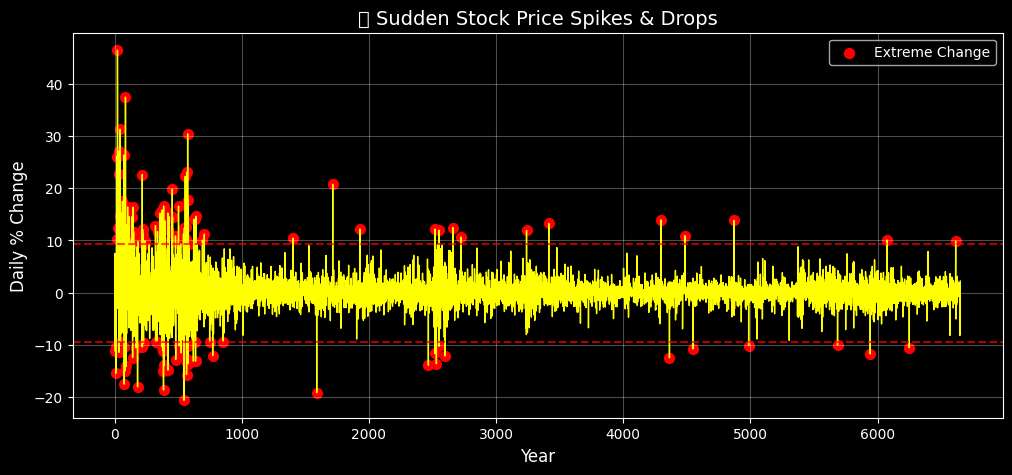

In [30]:
df["Daily Change %"] = df["Close"].pct_change() * 100

threshold = df["Daily Change %"].std() * 3  
spikes = df[(df["Daily Change %"] > threshold) | (df["Daily Change %"] < -threshold)]

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Daily Change %"], color="yellow", linewidth=1)
plt.scatter(spikes.index, spikes["Daily Change %"], color="red", s=50, label="Extreme Change")
plt.axhline(threshold, color="red", linestyle="--", alpha=0.7)
plt.axhline(-threshold, color="red", linestyle="--", alpha=0.7)

plt.xlabel("Year", fontsize=12, color="white")
plt.ylabel("Daily % Change", fontsize=12, color="white")
plt.title("🚀 Sudden Stock Price Spikes & Drops", fontsize=14, color="white")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# **📈 Correlation & Trend Analysis**

### **1️⃣ Correlation Between Stock Prices**

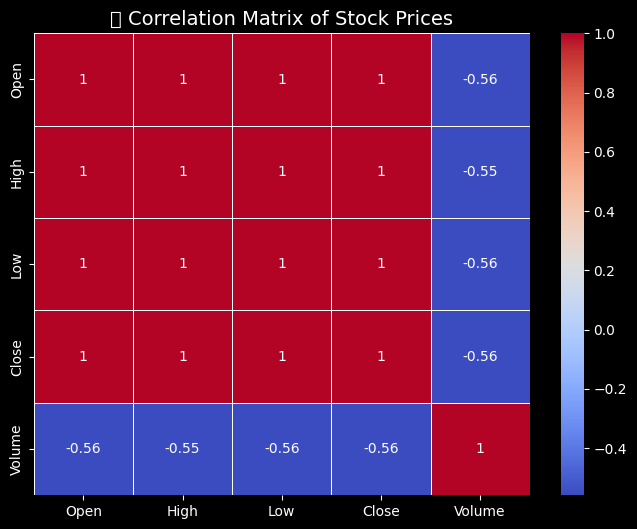

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["Open", "High", "Low", "Close", "Volume"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔄 Correlation Matrix of Stock Prices", fontsize=14, color="white")
plt.show()

### **2️⃣ Lag Analysis (Previous Day vs. Next Day Prices)**

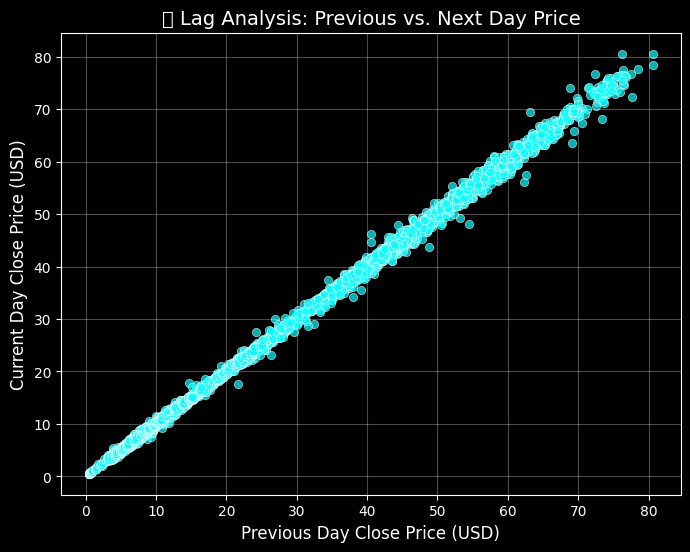

In [32]:
df["Prev Close"] = df["Close"].shift(1)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Prev Close"], y=df["Close"], color="cyan", alpha=0.7)
plt.xlabel("Previous Day Close Price (USD)", fontsize=12, color="white")
plt.ylabel("Current Day Close Price (USD)", fontsize=12, color="white")
plt.title("🔁 Lag Analysis: Previous vs. Next Day Price", fontsize=14, color="white")
plt.grid(alpha=0.3)
plt.show()

### **3️⃣ Moving Averages vs. Actual Price**

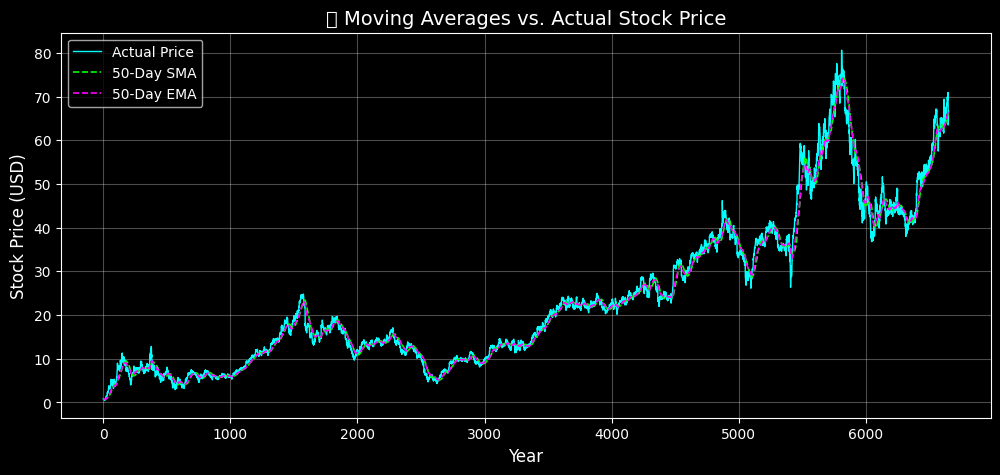

In [33]:
df["SMA_50"] = df["Close"].rolling(window=50).mean()
df["EMA_50"] = df["Close"].ewm(span=50, adjust=False).mean()

plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Close"], color="cyan", linewidth=1, label="Actual Price")
plt.plot(df.index, df["SMA_50"], color="lime", linewidth=1.2, linestyle="--", label="50-Day SMA")
plt.plot(df.index, df["EMA_50"], color="magenta", linewidth=1.2, linestyle="--", label="50-Day EMA")

plt.xlabel("Year", fontsize=12, color="white")
plt.ylabel("Stock Price (USD)", fontsize=12, color="white")
plt.title("📊 Moving Averages vs. Actual Stock Price", fontsize=14, color="white")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

## **🎉 Thank You for Exploring! 🚀**  

I appreciate you taking the time to go through this notebook. I hope it provided valuable insights into **eBay Stock Analysis** 📈.  

If you found this notebook helpful, please consider **sharing your thoughts** in the comments 💬. Your feedback is always welcome!  

🔹 **Follow me for more exciting data science projects!** 🔹  

💡 Happy Coding & Keep Exploring! 🧑‍💻✨  

---